In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go


In [2]:
ttf = pd.read_csv('../data/interpolated/ttf_close_interpolated.csv')
ttf['date'] = pd.to_datetime(ttf['Date'])
ttf = ttf.set_index('date')

nbp = pd.read_csv('../data/interpolated/nbp_close_interpolated.csv')
nbp['date'] = pd.to_datetime(nbp['Date'])
nbp = nbp.set_index('date')

the = pd.read_csv('../data/interpolated/the_close_interpolated.csv')
the['date'] = pd.to_datetime(the['Date'])
the = the.set_index('date')

In [3]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=ttf.index, y=ttf['CLOSE'], mode='lines', name='TTF'))
fig.add_trace(go.Scatter(x=nbp.index, y=nbp['CLOSE'], mode='lines', name='NBP'))
fig.add_trace(go.Scatter(x=the.index, y=the['CLOSE'], mode='lines', name='THE'))

fig.update_layout(title='CLOSE Prices Over Time',
                  xaxis_title='Date',
                  yaxis_title='CLOSE Price')

fig.show()

In [4]:
# Calculate the spread between TTF and NBP
spread = ttf['CLOSE'] - nbp['CLOSE']

fig.add_trace(go.Scatter(x=ttf.index, y=spread, mode='lines', name='TTF - NBP', line=dict(color='green')))
fig.update_layout(title='Spread between TTF and NBP',
                  xaxis_title='Date',
                  yaxis_title='Spread (EUR/MWh)')
fig.show()

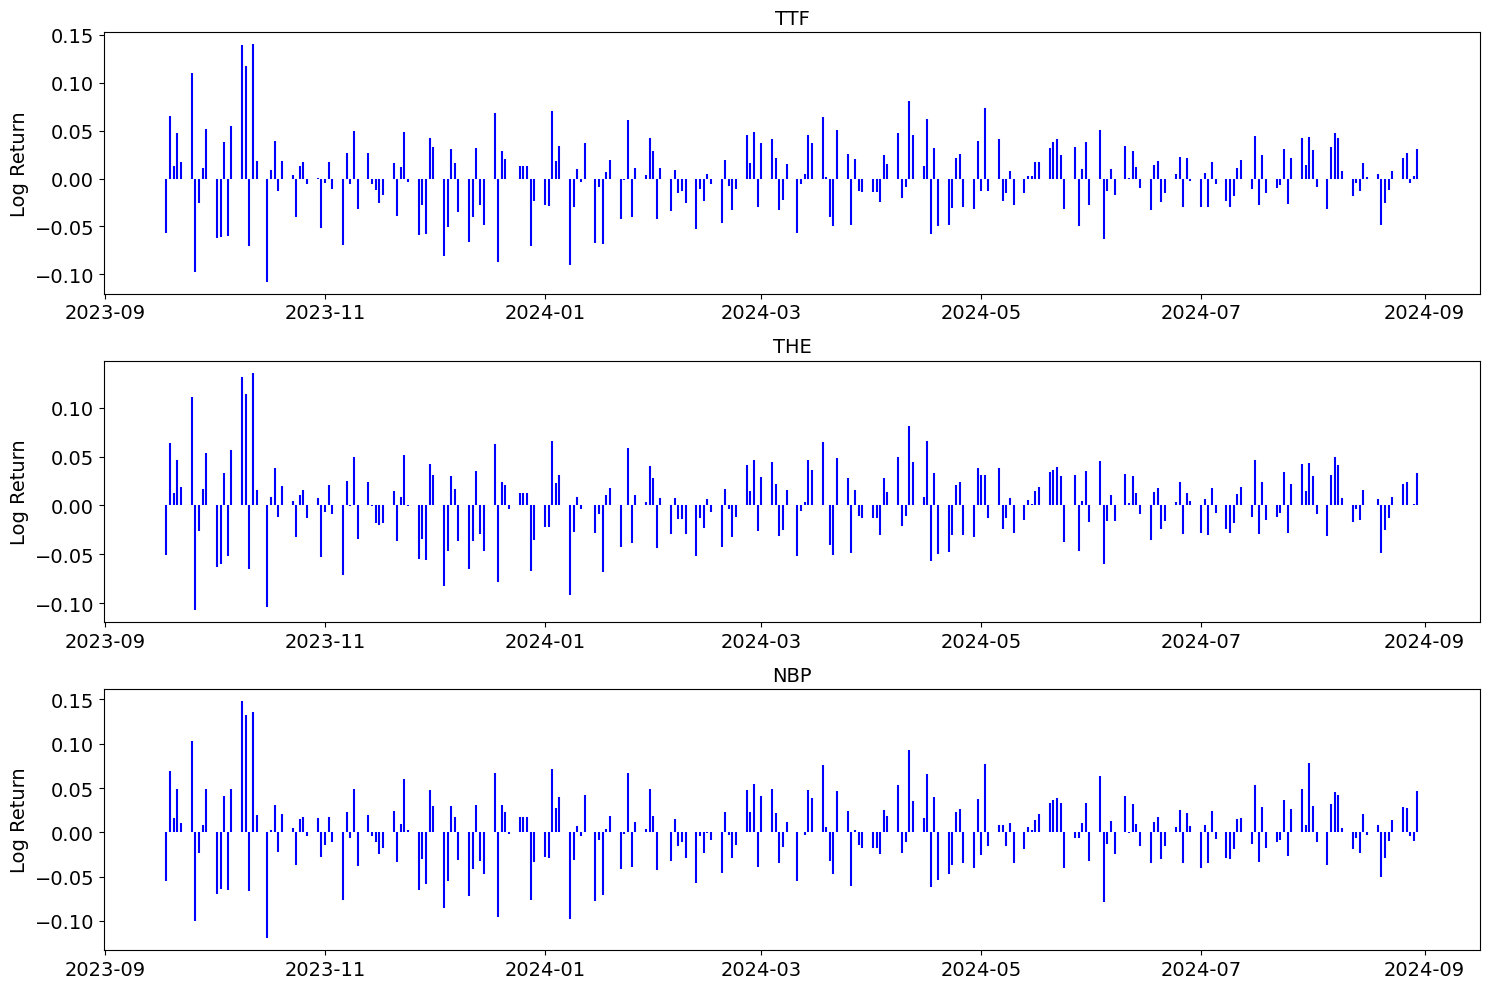

In [ ]:
import matplotlib.pyplot as plt
ttf['log_return'] = np.log(ttf['CLOSE'] / ttf['CLOSE'].shift(1))
the['log_return'] = np.log(the['CLOSE'] / the['CLOSE'].shift(1))
nbp['log_return'] = np.log(nbp['CLOSE'] / nbp['CLOSE'].shift(1))



plt.figure(figsize=(15, 10))

length = 250

plt.subplot(3, 1, 1)
plt.vlines(ttf.index[-length:], 0, ttf['log_return'][-length:], colors='blue', label='TTF')
plt.ylabel('Log Return', fontsize=14)
plt.title('TTF', fontsize=14)
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(3, 1, 2)
plt.vlines(the.index[-length:], 0, the['log_return'][-length:], colors='blue', label='THE')
plt.ylabel('Log Return', fontsize=14)
plt.title('THE', fontsize=14)
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(3, 1, 3)
plt.vlines(nbp.index[-length:], 0, nbp['log_return'][-length:], colors='blue', label='NBP')
plt.ylabel('Log Return', fontsize=14)
plt.title('NBP', fontsize=14)
plt.grid(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


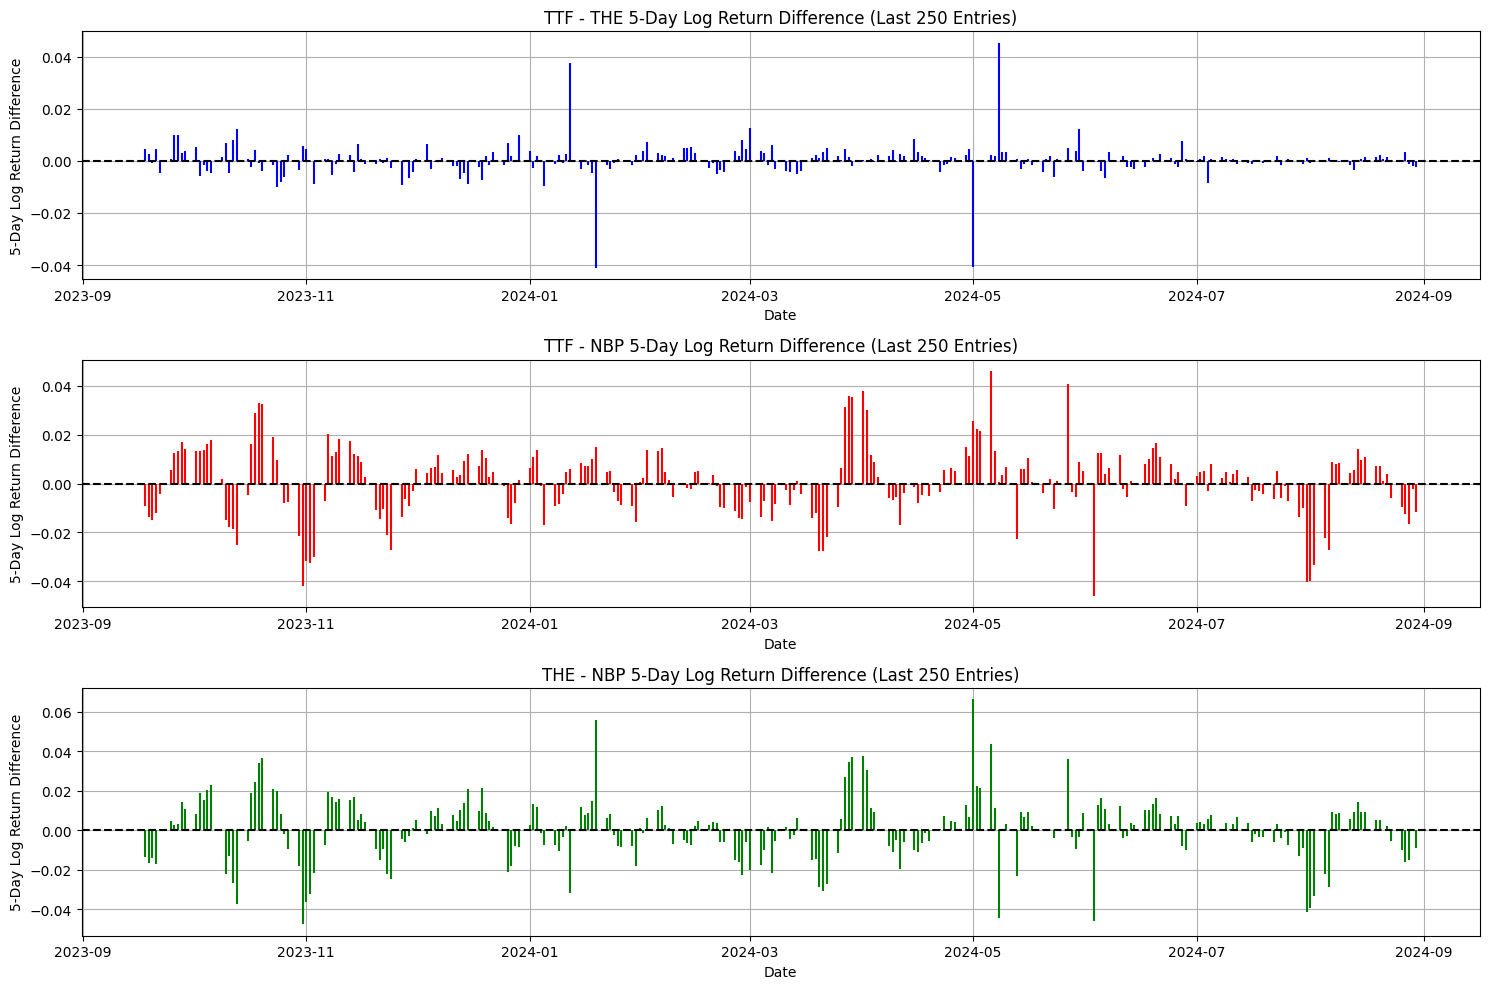

In [ ]:
ttf_the_diff = ttf['log_return'] - the['log_return']
ttf_nbp_diff = ttf['log_return'] - nbp['log_return']
the_nbp_diff = the['log_return'] - nbp['log_return']

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.vlines(ttf.index[-250:], 0, ttf_the_diff[-250:], colors='blue', label='TTF - THE')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('5-Day Log Return Difference')
plt.title('TTF - THE 5-Day Log Return Difference (Last 250 Entries)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.vlines(ttf.index[-250:], 0, ttf_nbp_diff[-250:], colors='red', label='TTF - NBP')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('5-Day Log Return Difference')
plt.title('TTF - NBP 5-Day Log Return Difference (Last 250 Entries)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.vlines(ttf.index[-250:], 0, the_nbp_diff[-250:], colors='green', label='THE - NBP')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('5-Day Log Return Difference')
plt.title('THE - NBP 5-Day Log Return Difference (Last 250 Entries)')
plt.grid(True)

plt.tight_layout()
plt.show()




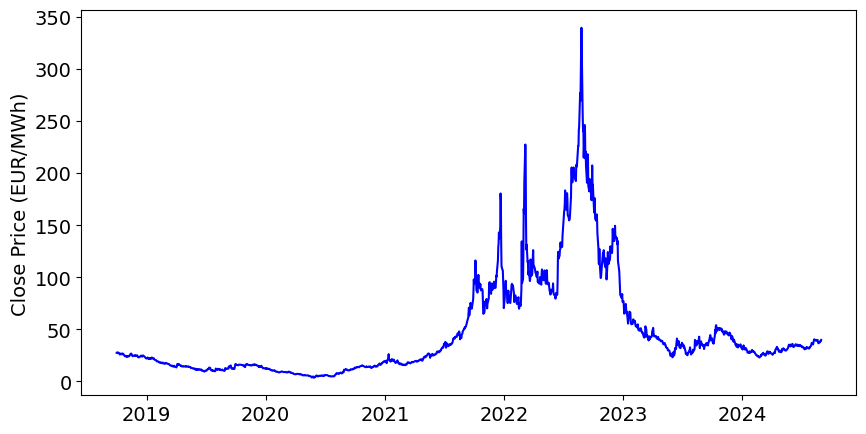

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ttf.index, ttf['CLOSE'], label='TTF', color='blue')

plt.ylabel('Close Price (EUR/MWh)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


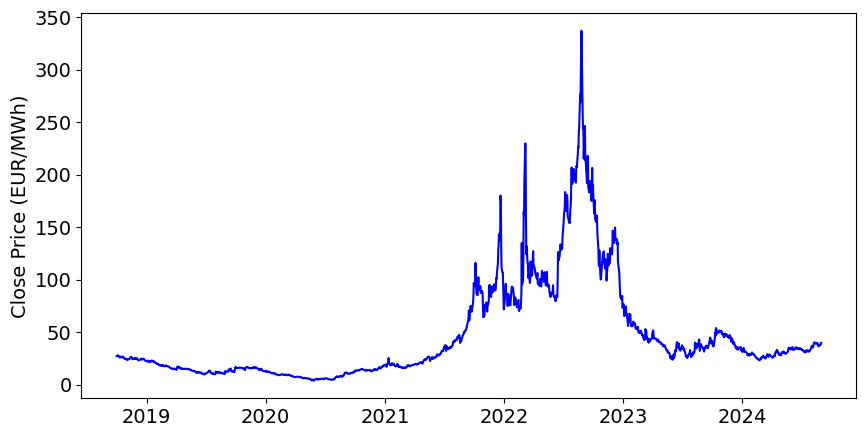

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(the.index, the['CLOSE'], label='THE', color='blue')

plt.ylabel('Close Price (EUR/MWh)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



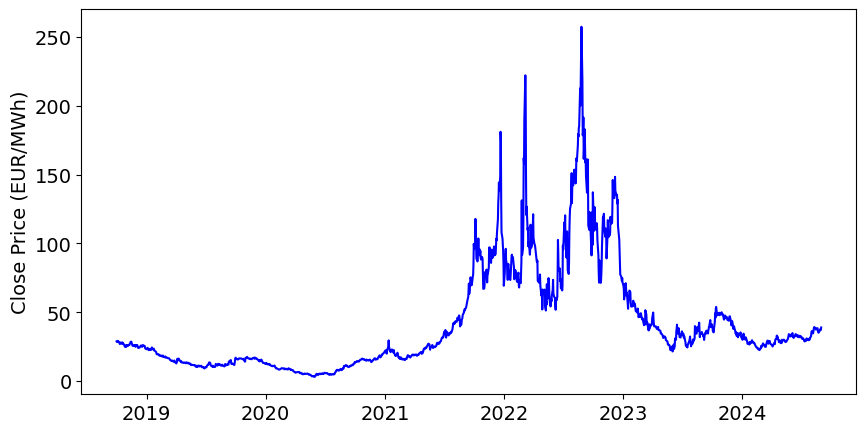

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(nbp.index, nbp['CLOSE'], label='NBP', color='blue')

plt.ylabel('Close Price (EUR/MWh)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()